# 제32회 ADP 실기 대비 - 핵심만 요약한 통계와 머신러닝 파이썬 코드북

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
# plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 설정

# Colab 한글 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# 1장. 탐색적 데이터 분석(EDA)
- EDA는 본격적으로 데이터를 분석하기에 앞서 데이터를 대략적으로 파악하기 위해 진행한다.
- 데이터 내 변수의 종류가 질적변수(Qualitative variable)인지 양적변수(Quantitative variable)인지에 따라 데이터를 탐색하는 방법이 다르다.
- 질적변수는 명목척도(예: 성별, 국가)와 서열척도(예: 학년, 등급)에 해당하는 개념이며, 도수분포표, 상대도수분포표, 상관계수, 막대 그래프, 파이 그래프 등으로 탐색한다.
- 양적변수는 실수와 정수로 표현되는 수치형 데이터로서 등간척도(예: 온도, 시간)와 비율척도(예: 몸무게, 가격)에 해당하는 개념이며, 도수분포표, 상대도수분포표, 대푯값, 산포도, 왜도, 첨도, 상관계수, 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도 등으로 탐색한다.

## 1-1. 공통

### 데이터 불러오기
- pandas의 read_csv를 통해 csv 파일을 데이터프레임의 형태로 불러올 수 있는데, 이를 print로 출력해보면 데이터의 내용을 확인할 수 있다.
- 예제에서는 데이터의 앞 2개 행만 출력하였다.
- 변수들을 살펴보면, PassengerId(승객고유번호), Survived(생존여부, 1=생존, 0=사망), Pclass(티켓 클래스, 1=1st, 2=2nd, 3=3rd), Name, Sex, Ticket(티켓 번호), Cabin(객실번호), Embarked(승선항, C=Cherbourg, Q=Queenstown, S=Southampton)는 질적변수로 볼 수 있고, Age, SibSp(동승한 형제자매 및 배우자의 수), Parch(동승한 부모 및 자녀의 수), Fare는 양적변수로 판단할 수 있다.

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 데이터 기본 정보 확인
- 데이터프레임 객체에 **`info()`**를 함으로써 변수별 결측치의 개수와 데이터 타입을 확인할 수 있다.
- 먼저, 결측치를 살펴보면 Age, Cabin, Embarked는 결측치가 있는 것으로 확인된다.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Cabin은 결측치가 과반수 이상이기 때문에 특성을 삭제하기로 하며, 이와 더불어 결측치는 없지만 수치적 의미가 없는 것으로 보이는 PassengerId도 삭제한다.

In [ ]:
titanic.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)

- Age와 Embarked의 결측치는 별도의 처리를 통해 보충할 수 있는데,이 부분은 <2-1. 결측치 처리>에서 자세히 다루기로 한다.
- 다음으로 변수별 데이터 타입을 살펴보면, 수치로 표현된 데이터의 타입은 int64(정수), float64(실수)로, 텍스트로 표현된 데이터의 타입은 object로 되어있는 것을 알 수 있다.
- 질적변수임에도 불구하고 양적변수로 표현된 Survived, Pclass와 나머지 질적변수들의 데이터 타입은 아래와 같이 category 타입으로 변경할 수 있다.

In [ ]:
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']

for col in qual:
    titanic[col] = titanic[col].astype('category')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB


### 기술통계
- 데이터프레임 객체에 **`describe()`**를 함으로써 각 데이터 타입 별로 데이터의 기술 통계를 확인할 수 있다.
- 질적변수에 대해서는 count(데이터 개수), unique(범주형 변수의 level의 개수), top(빈도가 가장 높은 level), freq(top level의 빈도)라는 정보를 제공한다.
- 예를 들어, Embarked라는 질적변수는 889개의 데이터를 가지고 있고, 3개의 level을 가지고 있으며 그 중 빈도가 가장 높은 level은 S인데 그 빈도는 644개라는 의미이다.

- 양적변수는 count(데이터 개수), mean(평균), std(표준편차), min(최솟값), 25%(1사분위수), 50%(2사분위수 혹은 중앙값), 75%(3사분위수), max(최댓값)라는 정보를 제공한다.
- 예를 들어, Age라는 양적변수는 데이터 개수가 714개이고, 평균은 29.69살이며 표준편차는 14.52살이고, 나이의 최솟값은 0.42살이고, 최댓값은 80살인데 1, 2, 3사분위수는 차례로 20.12, 28, 38살이라는 뜻이다.
- **`describe()`**의 파라미터 **`include`**를 'all'로 설정하면 모든 데이터 타입의 변수에 대해 기술 통계를 제공하고,  include=['float64', 'int64']와 같이 특정 데이터 타입의 리스트를 입력하면 해당 데이터 타입에 대한 기술 통계만 확인할 수 있다.

In [ ]:
titanic.describe(include=['float64', 'int64'])

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


- 한편, 질적변수 중 Ticket은 681개라는 과도한 level을 가지고 있는 것을 확인하였고, 질적변수로서 분석할 의미가 없다고 판단하여 분석에서 삭제하기로 한다.

In [ ]:
titanic.describe(include=['category'])

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"Abbing, Mr. Anthony",male,1601,S
freq,549,491,1,577,7,644


## 1-2. 질적변수

### 도수분포표, 상대도수분포표
- 질적변수의 데이터들은 **`value_counts(), DataFrame()`**을 사용해서 도수분포표, 상대도수분포표로 나타낼 수 있다.
- 특히, value_counts를 사용할 때 normalize=True를 적용하여 간단하게 상대도수를 계산할 수 있다. 다음은 변수 Survived의 예제이다.

In [ ]:
freq = pd.DataFrame(titanic['Survived'].value_counts())
freq

,count
Survived,
0,549
1,342


#### 상대도수분포표 추가

In [ ]:
freq['상대도수분포표'] = titanic['Survived'].value_counts(normalize=True)
freq.columns = ['도수', '상대도수분포표']
freq

,도수,상대도수분포표
Survived,,
0,549,0.616162
1,342,0.383838


### 상관계수: 스피어만(Spearman) 순위상관계수, 켄달의 타우(Kendall's Tau)
- 스피어만의 순위상관계수와 켄달의 타우는 질적변수 중에서도 관측치가 서열척도로 된 변수들 간의 상관관계를 나타낸다.
- 상관계수에 대한 자세한 설명은 <7-2. 상관계수>에서 다루기로 한다.
- 다음 예제에서 질적변수인 Survived와 Pclass가 음의 상관관계(-0.340, -0.324)를 가지며, 이 상관계수가 통계적으로 유의하다(p-value가 0.05 이하)는 것을 알 수 있다.

In [ ]:
from scipy.stats import spearmanr, kendalltau

corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print(f"스피어만 상관계수: {corr}, p-value는 {p}")

corr2, p2 = kendalltau(titanic['Survived'], titanic['Pclass'])
print(f"켄달타우 상관계수: {corr2}, p-value는 {p2}")

스피어만 상관계수: -0.33966793665005257, p-value는 1.6876081409966053e-25
켄달타우 상관계수: -0.32353318439409545, p-value는 3.932785644652603e-24


### 질적변수 탐색 시각화
- 막대 그래프, 파이 그래프 등으로 데이터를 시각화 하기 위해서 Matplotlib 라이브러리를 사용한다.
- 그래프를 그리기에 앞서 그래프 환경 설정을 하는데 **`plt.rcParams`**로 그래프 크기, 글꼴, 글꼴 크기, 마이너스 표기 등 각 항목을 설정할 수 있다.
- 그래프에 한글을 적용하려면 한글을 지원하는 글꼴로 설정을 해주어야 한다.
- Window 환경에서는 'Malgun Gothic', Mac 환경에서는 'AppleGothic'을 적용하면 된다.
- 아래 예제에서는 'D2Coding'이라는 글꼴을 별도로 설치하여 그래프에 적용하였다.

- 막대 그래프의 경우, 히스토그램과 달리 각 계급이 분리되어 있다는 것을 강조하기 위해서 막대가 서로 분리되어 있다.
- 파이 그래프의 부채꼴 각도는 각 계급의 상대도수에 대응하는데 아래에서는 0이라는 계급의 상대도수가 0.61이므로 그 부채꼴 각도는 0.61 * 360도 = 219.6도로 나타난다.

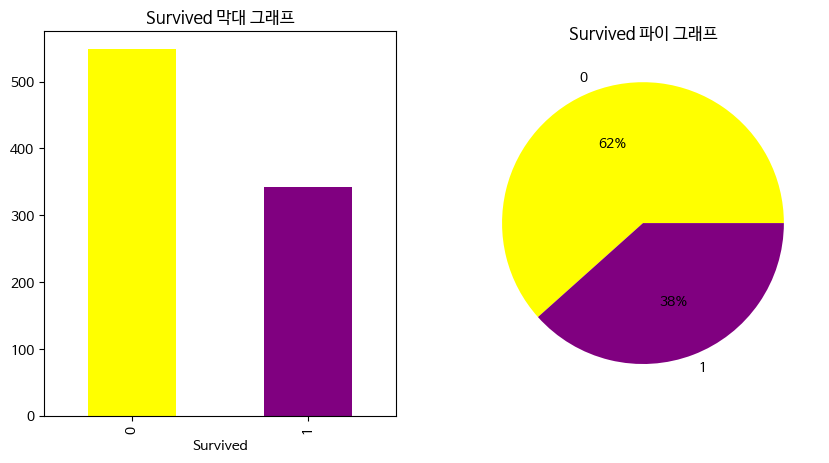

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # 그래프 구성

# 막대그래프
ax[0].set_title("Survived 막대 그래프")
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple'])

# 파이그래프
ax[1].set_title("Survived 파이 그래프")
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, autopct="%2.f%%", colors=['yellow', 'purple'])

plt.show()

## 1-3. 양적변수
- 양적변수는 도수분포표, 상대도수분포표, 대푯값, 산포도, 왜도, 첨도, 상관계수, 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도 등으로 데이터를 탐색해 볼 수 있다.

### 도수분포표, 상대도수분포표
- 양적변수의 도수분포표를 그리기 위해서는 먼저 계급을 설정해주어야 한다.
- 일반적으로 계급의 개수는 5~20개로 사이로 설정하며, 계급의 크기는 (자료의 최댓값 - 최솟값) / (계급의 수)로 구한다.
- Pandas 라이브러리의 cut을 사용하면 손쉽게 도수분포표와 상대도수분포표를 생성할 수 있다.
- 방법은 두 가지가 있는데, 계급의 개수를 지정하거나 계급의 범위를 지정해서 bins라는 파라미터에 입력함으로써 분포표를 생성하는 방법이다.

- **`cut()`**을 통해 얻은 결과는 각 데이터가 어떤 계급에 속하는지를 나타내기 떄문에, 해당 데이터에 **`value_counts()`**를 적용하고 **`reset_index()`**로 인덱스를 리셋한 후에 계급과 빈도로 column명을 변경하는 절차를 거쳐 도수분포표를 얻을 수 있다.
- 이 때 도수분포표는 빈도수의 내림차순으로 되어 있으므로, 계급을 기준으로 오름차순 정렬을 원하는 경우, **`sort_values(by='계급')`**을 적용해야 한다.
- 아래에서는 상대도수를 구하기 위해 **`apply(lambda x:)`**를 사용하여 각 도수들(x)을 도수의 합(sum)으로 나누었다.

In [ ]:
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts())
freq1.reset_index(inplace=True)
freq1.columns = ['계급', '도수']
freq1.sort_values(by='계급', inplace=True)

# freq1의 상대도수분포표 추가
freq1['상대도수'] = freq1['도수'].apply(lambda x: x / freq1['도수'].sum())
freq1

,계급,도수,상대도수
2,"(0.34, 16.336]",100,0.140056
0,"(16.336, 32.252]",346,0.484594
1,"(32.252, 48.168]",188,0.263305
3,"(48.168, 64.084]",69,0.096639
4,"(64.084, 80.0]",11,0.015406


- bins에서 계급의 범위를 지정할 때 right=True를 지정하면 계급의 범위 중 왼쪽 값 초과 오른쪽 값 이하로 계급의 범위가 설정되고, right=False로 지정하면 왼쪽 값 이상 오른쪽 값 미만으로 계급의 범위가 설정된다.
- 예를 들어. right=False로 지정하면 아래와 같이 0 이상 20 미만, 20 이상 40 미만, 40 이상 60 미만, 60 이상으로 계급을 설정하게 된다.
- 'inf'는 양의 무한대를 가리킨다.

In [ ]:
# 계급의 범위를 지정하여 도수분포표 생성
result2 = pd.cut(titanic['Age'], bins=[0, 20, 40, 60, float('inf')], right=False)
freq2 = pd.DataFrame(result2.value_counts())
freq2.reset_index(inplace=True)
freq2.columns = ['계급', '도수']
freq2.sort_values(by='계급', inplace=True)

# freq2의 상대도수 추가
freq2['상대도수'] = freq2['도수'].apply(lambda x: x / freq2['도수'].sum())
freq2

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


### 계산적 대푯값
- 계산적 대푯값에는 산술평균(Arithmetic mean), 기하평균(Geometric mean), 조화평균(Harmonic mean), 절사평균(Trimmed mean), 평방평균(Quadratic mean) 등이 있다.
    - 산술평균: 주어진 수의 합을 수의 개수로 나눈 값
    - 기하평균: n개의 양수의 곱의 n 제곱근의 값으로서, 물가 변동률, 경제 성장률, 임금 인상률 등 시간적으로 변화하는 비율의 대푯값
    - 조화평균: 역수의 산술평균의 역수로서, 평균 작업 속도, 평균 속도 등 시간적으로 계속 변화하는 속도의 대푯값
    - 절사평균: 자료의 총 개수에서 일정 비율만큼 가장 큰 부분과 작은 부분을 제거한 후 산출한 산술평균
    - 평방평균: 주어진 수를 각각 제곱하여 산술평균을 구하고 제곱근을 취한 것으로서, 비정상적 관측치의 영향을 부각시킬 때 사용
- 동일한 데이터일지라도 대푯값의 종류에 따라 값이 다르게 나온다.
- 평방평균의 경우, 라이브러리에서 지원하는 클래스가 없어서 직접 계산하였다.
- 리스트 내 각 요소의 제곱을 구하기 위해서 데이터 타입을 리스트에서 어레이로 변경한 후 계산하였다.

In [ ]:
from scipy.stats.mstats import gmean, hmean, tmean

example = [1, 2, 3, 4, 5, 10]

print(f"산술평균: {np.mean(example)}")
print(f"기하평균: {gmean(example)}")
print(f"조화평균: {hmean(example)}")

# 1 이상 5 이하의 범위를 벗어나는 값을 제외
print(f"절사평균: {tmean(example, (1, 5))}")

# 평방평균
qm = np.sqrt(np.mean(np.array(example)**2)) # list를 array로 변경한 후 계산
print(f"평방평균: {qm}")

산술평균: 4.166666666666667
기하평균: 3.2598444275495897
조화평균: 2.5174825174825175
절사평균: 3.0
평방평균: 5.082650227325635


### 위치적 대푯값
- 위치적 대푯값으로는 중위수(Median), 최빈값(Modes), 사분위수(Quartile), 분위수(Quantile), 백분위수(Percentile)가 있다.
- 이 중, 중위수와 2사분위수, 0.5분위수, 50백분위수는 서로 동일한 값을 가리킨다.

In [ ]:
print(f"중위수: {titanic['Fare'].median()}")
print(f"최빈값: {titanic['Fare'].mode()[0]}")
print(f"1사분위수: {titanic['Fare'].quantile(0.25)}")
print(f"2사분위수: {titanic['Fare'].quantile(0.5)}")
print(f"3사분위수: {titanic['Fare'].quantile(0.75)}")
print(f"50백분위수: {np.percentile(titanic['Fare'], 50)}")
print(f"75백분위수: {np.percentile(titanic['Fare'], 75)}")

중위수: 14.4542
최빈값: 8.05
1사분위수: 7.9104
2사분위수: 14.4542
3사분위수: 31.0
50백분위수: 14.4542
75백분위수: 31.0


### 절대적 산포도
- 절대적 산포도로는 범위(Range), 사분위수범위(IQR, Interquartile range), 평균편차(MD, Mean deviation), 사분편차(QD, Quartile deviation), 분산(Variance), 표준편차(SD, Standard deviation)가 있다.
    - 범위: 관측값의 최댓값에서 최솟값을 뺀 값
    - 사분위수범위: 3사분위에서 1사분위수를 뺀 값
    - 평균편차: 편차의 절댓값의 산술평균
    - 사분편차: 사분위수범위 / 2
    - 분산: 편차의 제곱의 산술평균
    - 표준편차: 분산의 양의 제곱근

- 다음 예제의 파라미터 ddof는 delta degrees of freedom으로서 자유도(Degree of freedom)를 결정하는 파라미터이다.
- ddof=0으로 설정하면 (n-0)을 자유도로, ddof=1로 설정하면 (n-1)을 자유도로 설정하게 된다.
- 따라서 ddof=0은 모분산 혹은 모표준편차를 구할 때, ddof=1은 표본분산 혹은 표본표준편차를 구할 때 사용된다.

In [ ]:
print(f"범위: {titanic['Fare'].max() - titanic['Fare'].min()}")

iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
print(f"사분위수 범위: {iqr}")

md = np.mean(np.abs(np.array(titanic['Fare']) - np.mean(titanic['Fare'])))
print(f"평균편차: {md}")
print(f"사분편차: {iqr/2}")

print(f"모분산: {titanic['Fare'].var(ddof=0)}")
print(f"표본분산: {titanic['Fare'].var(ddof=1)}") # 자유도 n-1을 의미

print(f"모표준편차: {titanic['Fare'].std(ddof=0)}")
print(f"표본표준편차: {titanic['Fare'].std(ddof=1)}") # 자유도 n-1을 의미

범위: 512.3292
사분위수 범위: 23.0896
평균편차: 28.163691848778342
사분편차: 11.5448
모분산: 2466.665311685043
표본분산: 2469.436845743116
모표준편차: 49.6655344447741
표본표준편차: 49.6934285971809


### 상대적 산포도
- 상대적 산포도에는 사분위편차계수(CQD, Coefficient of quartile deviation), 평균편차계수(CMD, Coefficient of mean deviation), 변동계수(CV, Coefficient of variance)가 있다.
    - 사분위편차계수: 사분편차를 중앙값으로 나눈 값
    - 평균편차계수: 평균편차를 산술평균으로 나눈 값
    - 변동계수: 표준편차를 산술평균으로 나눈 값. 자료의 단위가 다르거나 평균의 차이가 클 때 평균에 대한 표준편차의 상대적 크기를 비교

In [ ]:
print(f"사분위편차계수: {iqr/2/titanic['Fare'].median()}")
print(f"평균편차계수: {md/titanic['Fare'].mean()}")
print(f"모집단 변동계수: {titanic['Fare'].std(ddof=0) / titanic['Fare'].mean()}")
print(f"표본집단 변동계수: {titanic['Fare'].std(ddof=1) / titanic['Fare'].mean()}")

사분위편차계수: 0.7987159441546402
평균편차계수: 0.8745345290361094
모집단 변동계수: 1.5422063630081666
표본집단 변동계수: 1.5430725278408497


### 왜도, 첨도
- 왜도(Skewness)는 관측값 분포의 비대칭 정도를 나타낸다. 왜도가 음수일 경우 분포의 왼쪽 부분에 긴 꼬리를 가지며, 왜도가 양수일 경우 오른쪽 부분에 긴 꼬리를 가진다. 정규분포의 왜도는 0이다.
- 첨도(Kurtosis)는 관측값 분포의 모양이 얼마나 뾰족한 지를 나타낸다. 극단적인 편차나 이상치가 많을 수록 큰 값을 나타낸다.
- 첨도가 3보다 큰 경우 정규분포보다 뾰족하고 꼬리가 얇은 분포를 가지며, 첨도가 3보다 작은 경우 정규분포보다 뾰족하지 않고 꼬리가 두꺼운 분포를 가진다. 정규분포의 첨도는 3이다.
- Pandas와 SciPy의 왜도와 첨도는 다소 다르게 나타나는데, Pandas는 bias 수정이 적용되지 않은 상태이고, SciPy는 bias 수정을 적용했기 때문이다. SciPy에서 bias=False로 설정하면 둘은 동일한 결과를 얻게 된다.

In [ ]:
print(f"왜도: {titanic['Fare'].skew()}, 첨도: {titanic['Fare'].kurt()}")

from scipy.stats import skew, kurtosis
ssF = skew(titanic['Fare'], bias=False)
skF = kurtosis(titanic['Fare'], bias=False)
ssT = skew(titanic['Fare'], bias=True)
skT = kurtosis(titanic['Fare'], bias=True)

print(f"왜도: {ssF}({ssT}), 첨도: {skF}({skT})")

왜도: 4.787316519674893, 첨도: 33.39814088089868
왜도: 4.787316519674893(4.7792532923723545), 첨도: 33.39814088089869(33.20428925264474)


### 상관계수: 피어슨의 적률상관계수
- 피어슨(Pearson)의 적률상관계수는 양적변수의 상관관계를 나타낸다.
- 다음 코드에 의하면 Age와 Fare의 상관계수는 0.093인데 이는 상관성이 거의 없다고 볼 수 있다.
- 한편, 해당 상관계수의 p-value 0.013을 보면 유의수준 0.05보다 작기 때문에 표본의 상관계수가 모상관계수 0과 차이가 없다는 귀무가설을 기각할 수 있다.
- 따라서 해당 상관계수는 통계적으로 유의하다고 본다.
- 피어슨 상관계수에 대한 자세한 설명은 <7-2. 상관계수>에서 다룬다.

In [ ]:
from scipy.stats import pearsonr

# PassengerId, Cabin이 없는 titanic에서 추가로 Age의 결측치가 있는 행을 삭제
titanic = titanic.dropna(axis=0)
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print(f"피어슨 상관계수: {corr}, p-value: {p}")

피어슨 상관계수: 0.09314251789411519, p-value: 0.01290455340704146


### 양적변수 탐색 시각화
- 양적변수를 탐색할 때 사용하는 시각화 방법으로는 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도 등이 있다.
- 줄기잎그림(Stem-and-leaf plot)은 데이터 세로선을 기준으로 줄기와 잎 두 부분으로 나누어 구분함으로써 데이터의 대략적 분포를 확인할 수 있게 한다.
- 자료의 개수가 많지 않을 경우에 사용하며, 자료가 많을 경우에는 히스토그램을 사용한다.

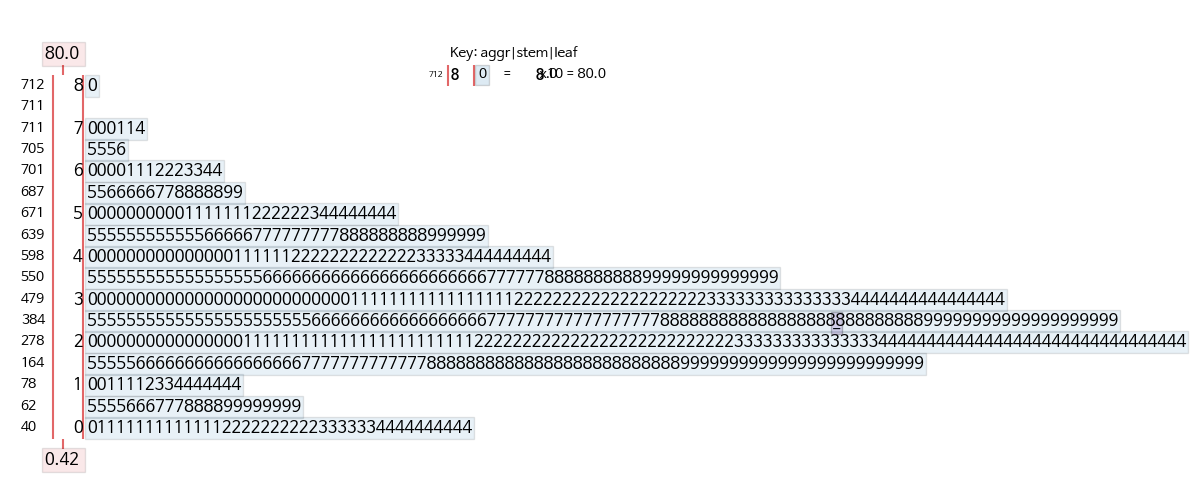

In [ ]:
import stemgraphic
stemgraphic.stem_graphic(titanic['Age'])
plt.show()

- 히스토그램(Histogram)은 도수분포의 상태를 도수분포표의 계급과 도수를 이용하여 기둥 모양으로 나타낸 그래프이다.
- x축에는 연속형 변수의 계급을 표시하고, y축에는 빈도를 표시한다.
- 아래에서는 기본 히스토그램, 계급의 개수를 설정한 히스토그램, 계급의 범위를 설정한 히스토그램을 각각 그려보았다.

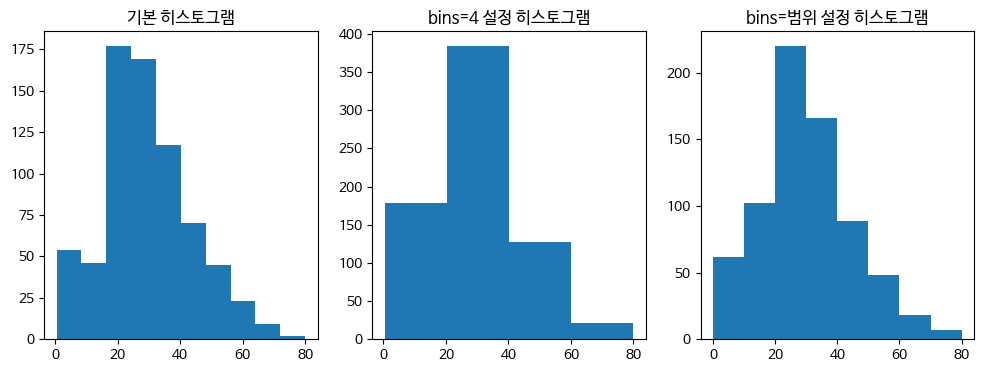

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(titanic['Age'])
ax[0].set_title("기본 히스토그램")
ax[1].hist(titanic['Age'], bins=4) # bin number 설정
ax[1].set_title("bins=4 설정 히스토그램")
ax[2].hist(titanic['Age'], bins=[i for i in range(0, 90, 10)]) # bin edges 설정
ax[2].set_title("bins=범위 설정 히스토그램")
plt.show()

- 오자이브(Ogive)는 누적도수다각형의 각 계급구간의 누적도수에 대응하는 기둥의 맨 위 중간점들을 직선으로 연결했을 때 나타나는 그래프이다.

[도수분포표]
         계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  154   563  35.0
3  (40, 50]   86   649  45.0
5  (50, 60]   42   691  55.0
6  (60, 70]   16   707  65.0
7  (70, 80]    5   712  75.0


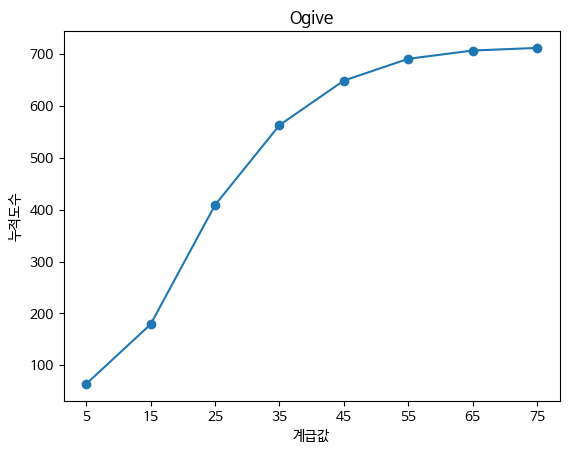

In [ ]:
# 도수분포표 생성
result1 = pd.cut(titanic['Age'], bins=[i for i in range(0, 90, 10)])
freq1 = pd.DataFrame(result1.value_counts())
freq1.reset_index(inplace=True)
freq1.columns = ['계급', '도수']
freq1.sort_values(by='계급', inplace=True)

freq1['누적도수'] = freq1['도수'].cumsum() # 누적도수 계산하여 표에 추가
freq1['계급값'] = freq1['계급'].apply(lambda x: np.median([x.left, x.right]))
print(f"[도수분포표]\n{freq1}")

plt.plot(freq1['계급값'], freq1['누적도수'], marker='o')
plt.xticks(freq1['계급값'])
plt.ylabel('누적도수')
plt.xlabel('계급값')
plt.title("Ogive")
plt.show()

- 상자그림(Box plot)은 통계학자 존 튜키가 고안하였는데, 상자수염그림이라고도 하며 5가지 요약 수치인 최솟값, 최댓값, 1, 2, 3사분위수를 통해 데이터의 산포도를 구체적으로 시각화 한다.
- 가운데 박스의 왼쪽 변이 1사분위수, 가운데 선이 2사분위수(중위수), 오른쪽 변이 3사분위수를 나타내고, 박스를 벗어난 양 옆의 수염이 각각 최솟값과 최댓값을 나타낸다. 동그라미로 표시된 데이터는 이상치를 가리킨다.

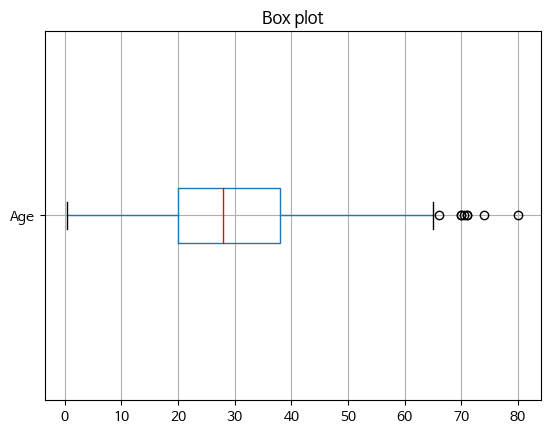

In [ ]:
# vert=False는 수평, True는 수직상자그림, medianprops의 color는 중위수 색상
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'})
plt.title("Box plot")
plt.yticks(ticks=[1], labels=['Age'])
plt.show()

- 산점도(Scatter plot)는 두 변수의 2차원 데이터를 좌표평면 위에 점으로 나타낸 그래프이다.
- 다음 그래프에서 보듯이 변수 Age와 Fare는 선형적 상관관계가 없는 것으로 나타난다.
- 반면, Xs, Ys는 산점도에서 선형적 상관관계를 확인할 수 있다.

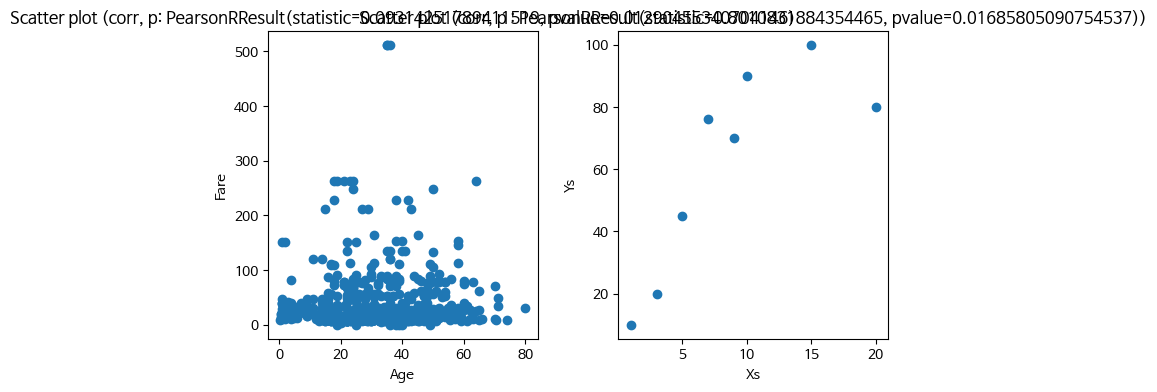

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

plt.subplots_adjust(wspace=0.3)
ax[0].scatter(titanic['Age'], titanic['Fare'])
ax[0].set_title(f"Scatter plot (corr, p: {pearsonr(titanic['Age'], titanic['Fare'])}")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

Xs = [1, 3, 5, 7, 9, 15, 20, 10]
Ys = [10, 20, 45, 76, 70, 100, 80, 90]
ax[1].scatter(Xs, Ys)
ax[1].set_title(f'Scatter plot (corr, p : {pearsonr(Xs, Ys)})')
ax[1].set_xlabel('Xs')
ax[1].set_ylabel('Ys')

plt.show()

## 연습문제

#### 1.
- 다음은 포르투갈 은행의 정기예금 프로모션 전화 데이터이다.
- 데이터는 고객의 특징을 나타내는 입력 변수들과 고객이 정기예금에 가입했는지 여부를 나타내는 출력 변수로 구성되어 있다.
- 데이터 컬럼 정의서는 아래와 같다.
- 시각화 방법을 포함하여 다음 데이터를 탐색적 분석하시오.

|변수명|설명|
|-|-|
|age|나이|
|job|직업의 형태|
|martial|결혼 상태|
|education|학력|
|default|신용 불이행 여부|
|balance|은행 잔고|
|housing|부동산 대출 여부|
|loan|개인 대출 여부|
|contact|연락 수단|
|month|마지막으로 연락한 달|
|y|고객이 정기예금에 가입했는지 여부|

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


In [ ]:
# 1. 데이터는 총 11개의 변수로 되어 있는데 이 중, age, balance는 양적 변수이고, job, marital, education, default, housing, loan, contact, month, y는 질적 변수이다. 전체 데이터의 크기는 4,521이며, 결측치는 없는 것으로 확인되었다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [ ]:
# 수치형 변수인 age와 balance의 기술통계는 다음과 같다. age의 평균은 41.17이고, 표준편차는 10.58이며 최솟값은 19, 최댓값은 87이다. 1/2/3사분위수는 각각 33, 39, 49이다. balance의 평균은 1422.66이고 표준편차는 3009.64이며 최솟값과 최댓값은 각각 -3313, 71188이다. 1/2/3사분위수는 각각 69, 444, 1480이다.
quan_feat = [feat for feat in df.columns if df[feat].dtypes== int]
print(df[quan_feat].describe().round(2))

           age   balance
count  4521.00   4521.00
mean     41.17   1422.66
std      10.58   3009.64
min      19.00  -3313.00
25%      33.00     69.00
50%      39.00    444.00
75%      49.00   1480.00
max      87.00  71188.00


In [ ]:
# 질적변수들을 살펴보면, job은 12개의 수준을 가지고 있고, 그 중 management라는 수준의 빈도가 969로 가장 높게 나타났다. marital의 경우 3개의 수준을 가지고 있고, married라는 수준의 빈도가 2797로 가장 높게 나타났다. 다른 질적변수들도 이와 같은 방식으로 해석할 수 있다. 타겟변수 y의 경우, 2개의 클래스를 가지는데 no가 4000개의 빈도로 전체 4521개 데이터의 대부분을 차지하기 때문에 클래스 불균형이라고 할 수 있다.
qual_feat = [feat for feat in df.columns if df[feat].dtypes== object]
print(df[qual_feat].describe().round(2))

               job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

           y  
count   4521  
unique     2  
top       no  
freq    4000  


[히스토그램]


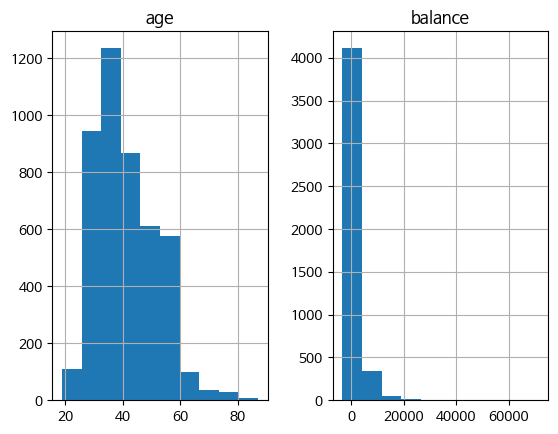

[상자그림]


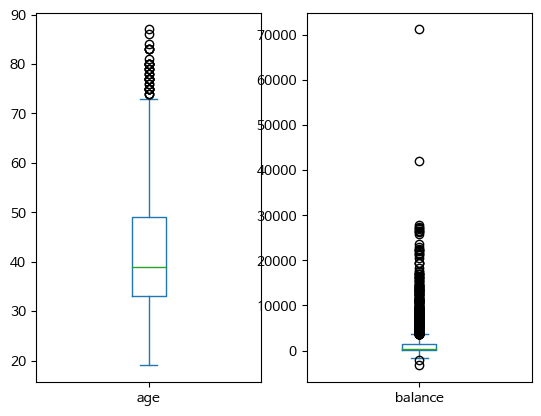

In [ ]:
# 히스토그램을 통해 두 변수 모두 데이터가 왼쪽으로 쏠려 있고, 오른쪽 꼬리를 가지는 데이터 분포임을 알 수 있다.
print("[히스토그램]")
df[quan_feat].hist()
plt.show()

# 상자그림을 통해 두 변수 모두 이상치를 가지고 있음을 확인하였고, 특히 balance의 경우 극단적인 이상치가 관찰된다.
print("[상자그림]")
df[quan_feat].plot(kind='box', subplots=True)
plt.show()

[막대 그래프]


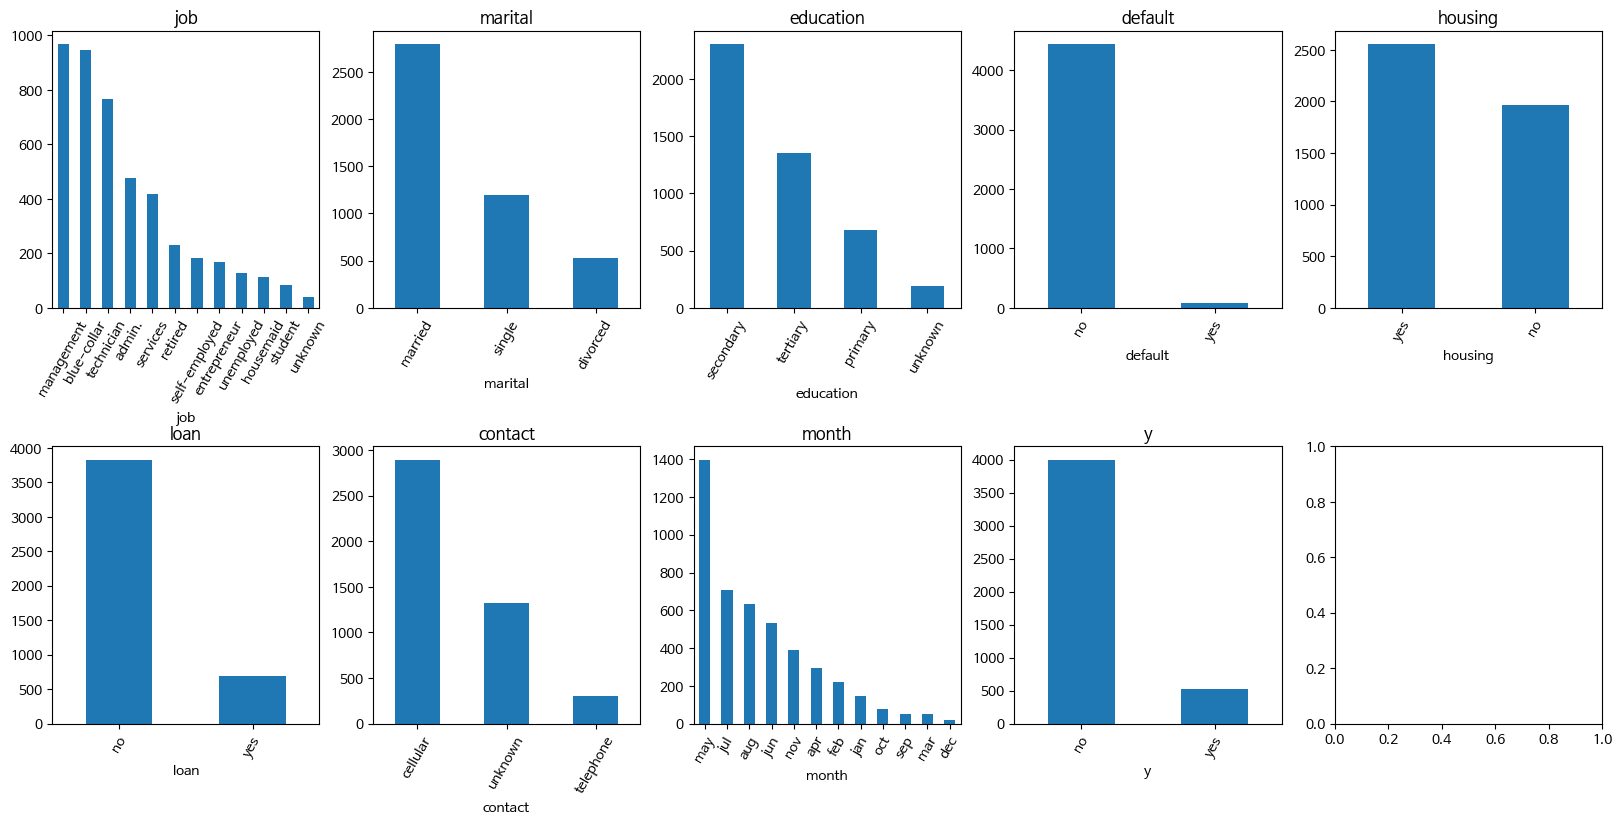

[파이 그래프]


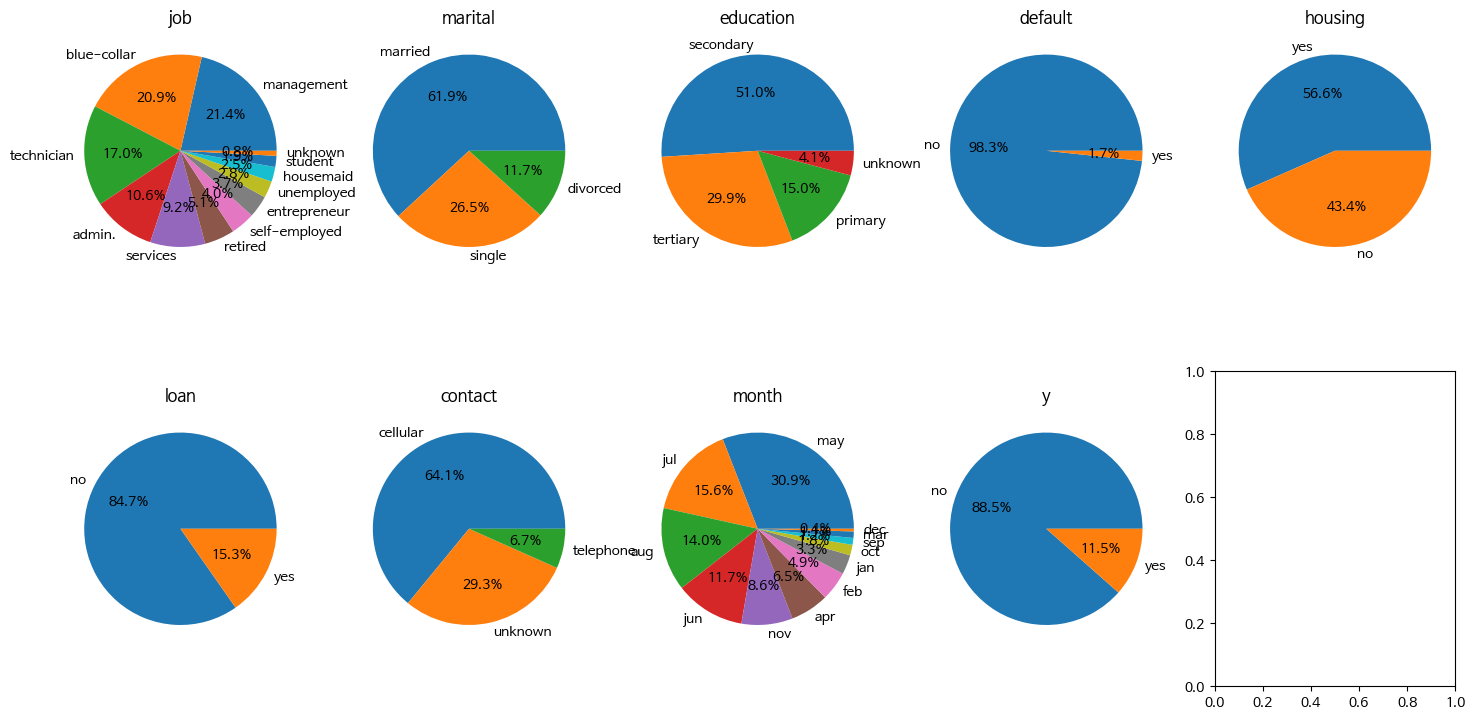

In [ ]:
# 질적변수들은 막대 그래프와 파이 그래프로 시각화 할 수 있으며 그 결과는 다음과 같다. 막대그래프로 각 변수들의 범주의 빈도를 비교할 수 있고, 파이그래프로 범주가 차지하는 비율을 확인할 수 있다.

print("[막대 그래프]")
fig, axes = plt.subplots(2,5, figsize=(20, 9))
plt.subplots_adjust(hspace=0.5)
for ax, feature in zip(axes.ravel(), qual_feat):
    ax.set_title(feature)
    df[feature].value_counts().plot.bar(ax=ax, rot=60)
plt.show()

from pandas import DataFrame
print("[파이 그래프]")
fig, axes = plt.subplots(2,5, figsize=(18, 9))
for ax, feature in zip(axes.ravel(), qual_feat):
    ax.set_title(feature)
    table = df[feature].value_counts()
    ax.pie(table.values, labels=table.index, autopct="%.1f%%")
plt.show()

#### 2.
- 어느 회사의 연도별 임금상승률을 조사하였더니, 아래 표와 같이 나타났다.
- 이 회사의 평균 임금상승률을 구하기 위해 어떤 대푯값을 구해야 하는지 설명하고, 그 값을 계산하시오.

In [ ]:
from scipy.stats import gmean

data = [0.04, 0.03, 0.05, 0.1, 0.08]
data = np.array(data)+1
a1 = gmean(data)-1
print("[라이브러리 계산] {:.4f}".format(a1))

a2 = (1.04*1.03*1.05*1.1*1.08)**(1/5)-1
print("[수기 계산] {:.4f}".format(a2))

# 정답: 기하평균, 5.97%

[라이브러리 계산] 0.0597
[수기 계산] 0.0597


#### 3.
- 한 회사원이 집에서 회사를 갈 때 시속 5km/h로 출근하고, 퇴근할 때 시속 7km/h로 돌아왔다면, 이 회사원의 평균 속도를 구하기 위해 어떤 대푯값을 구해야 하는지 설명하고, 그 값을 계산하시오.

In [ ]:
from scipy.stats import hmean
data = [5, 7]
a1 = hmean(data)
print("[라이브러리 계산] {:.4f}".format(a1))

a2 = 2*(5*7)/(5+7)
print("[수기 계산] {:.4f}".format(a2))

#정답: 조화평균, 5.83km/h

[라이브러리 계산] 5.8333
[수기 계산] 5.8333


#### 4.
- A 브랜드의 햄버거는 평균 무게 200g, 분산 49g인 정규분포를 따르고, 샌드위치는 평균 무게 190g, 분산 36g인 정규분포를 따른다고 한다.
- 방금 구매한 A 브랜드 햄버거와 샌드위치의 무게가 모두 210g이라면, 상대적으로 어느 것이 더 무거운가?

In [ ]:
hamburger = (210 - 200) / np.sqrt(49)
sandwich = (210 - 190) / np.sqrt(36)
print("햄버거 {:.2f}, 샌드위치 {:.2f}".format(hamburger, sandwich))

# 표준화한 점수로 두 개체의 무게를 비교해야 한다. 표준화 점수가 더 높은 샌드위치의 무게가 상대적으로 무겁다.
# 정답: 샌드위치

햄버거 1.43, 샌드위치 3.33


#### 5.
- A학교와 B학교 학생들을 대상으로 100명을 추출하여 용돈을 조사하였더니, A학교는 평균 10만원, 표준편차 2만원, B학교는 평균 8만원, 표준편차 1만원으로 나타났다.
- 어느 학교에서 용돈의 격차가 더 심하다고 볼 수 있는가?

In [ ]:
A = 2 / 10
B = 1 / 8
print("A {:.2f}, B {:.2f}".format(A, B))
# 해당 문제는 두 학교의 상대적 산포도인 변동계수를 구하여 비교해야 한다. A학교의 변동계수가 더 크기 때문에 격차가 더 심하다고 볼 수 있다.
# 정답: A학교

A 0.20, B 0.12
